In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
from time import time

sns.set_style("darkgrid")

## Load Data and EDA

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}'.format(df_train['target'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}'.format(df_test.shape[0]))

Number of Training Examples = 200000
Number of Test Examples = 200000
Training X Shape = (200000, 202)
Training y Shape = 200000
Test X Shape = (200000, 201)
Test y Shape = 200000


### Train Set
---

In [3]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


### Test Set
---

In [5]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


### Null Values
---

In [7]:
def null_values(df):
    if True in list(df.isnull().any()):
        return print(f'There are some null values!\n\n{df[df.columns[df.isnull().any()]].isnull().sum()}')
    else:
        return 'No null values in the Dataset!'

In [8]:
null_values(df_train)

'No null values in the Dataset!'

In [9]:
null_values(df_test)

'No null values in the Dataset!'

### Target Balance Train Set
---

The dataset has 89.95 % of target 0 and 10.05 % of target 1


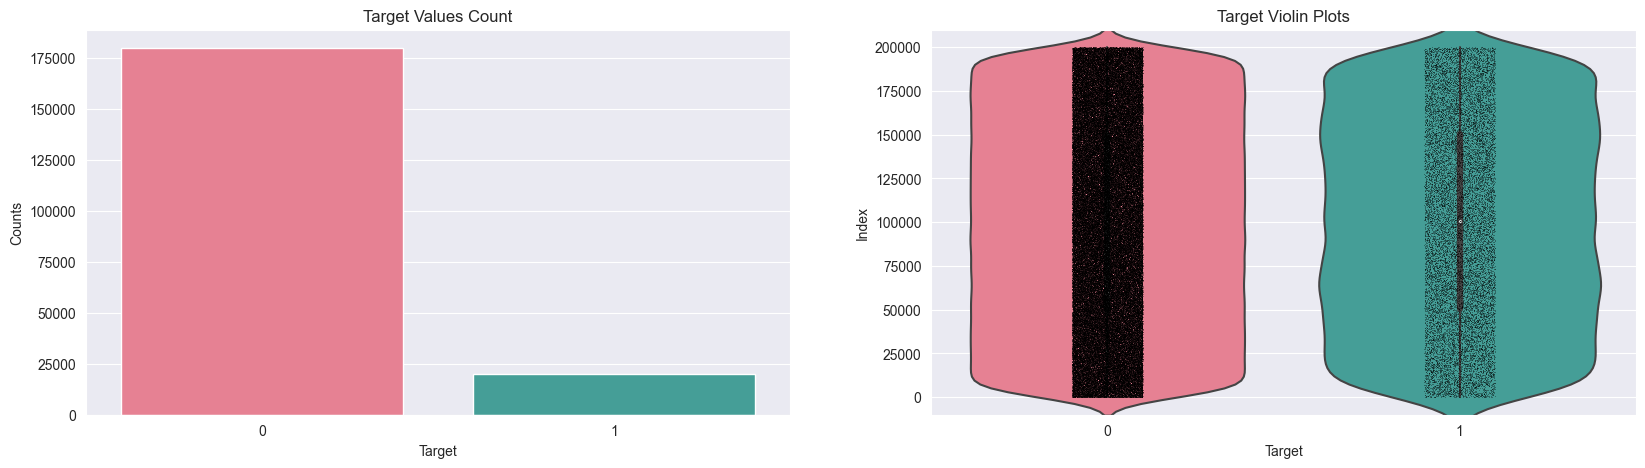

In [10]:
mylst = list(df_train["target"].value_counts())
zero = round(float((mylst[0] / sum(mylst)) * 100), 2)
one = round(float((mylst[1] / sum(mylst)) * 100), 2)
print('The dataset has {zero} % of target 0 and {one} % of target 1'.format(
    zero=zero, one=one))


fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(data=df_train, x='target', ax=ax[0], palette="husl")
sns.violinplot(x=df_train.target.values,
               y=df_train.index.values,
               ax=ax[1],
               palette="husl")
sns.stripplot(x=df_train.target.values,
              y=df_train.index.values,
              jitter=True,
              ax=ax[1],
              color="black",
              size=0.5,
              alpha=0.5)
ax[0].set_title('Target Values Count')
ax[0].set_xlabel("Target")
ax[0].set_ylabel("Counts")
ax[1].set_title('Target Violin Plots')
ax[1].set_xlabel("Target")
ax[1].set_ylabel("Index")


plt.show()

### Feature Key metrics distributions
---

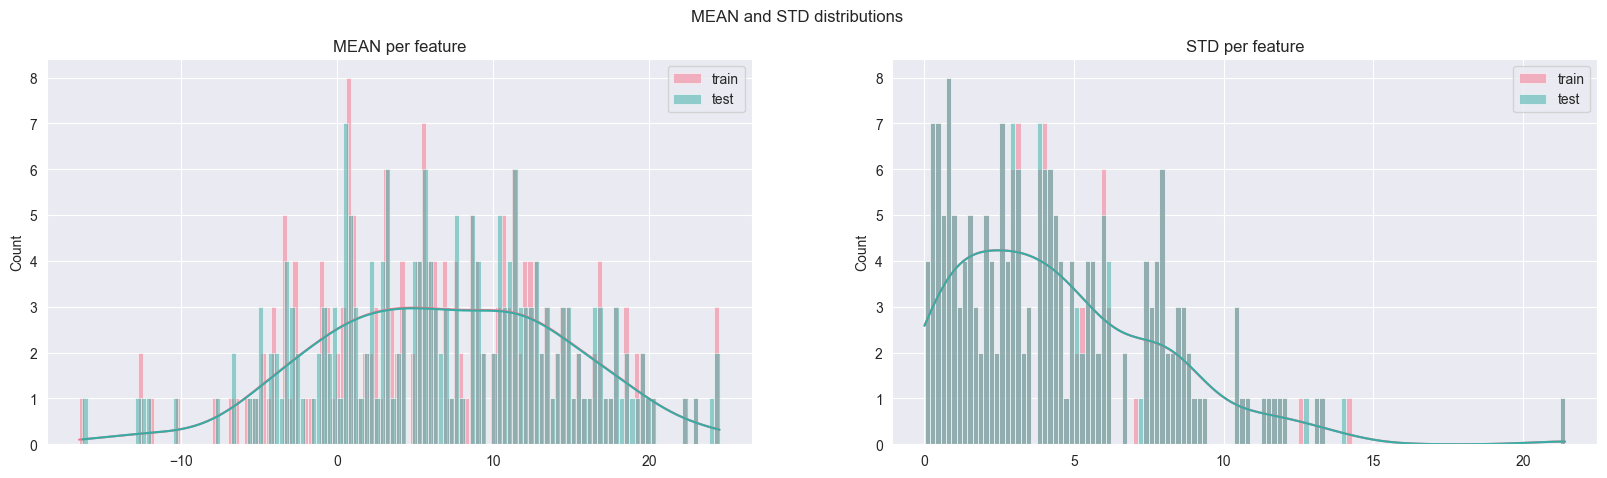

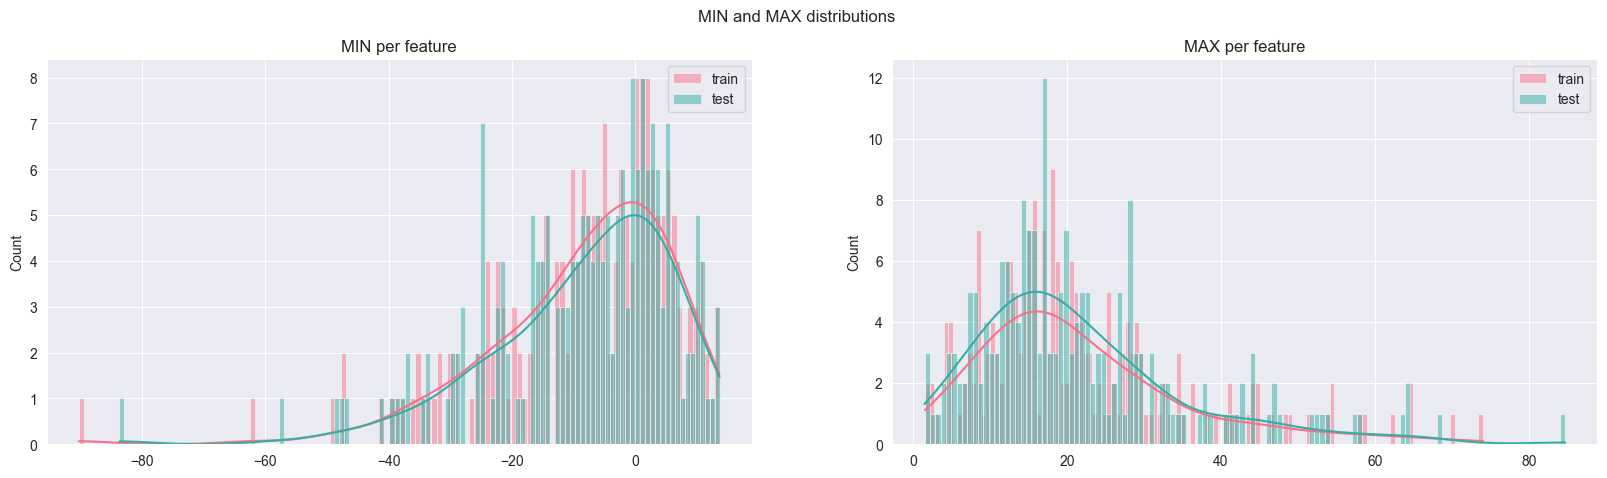

In [11]:
def pl(df_train, df_test, features, metric=list):
    """
    The function return 2 plots, one per metric. 
    It compare the metric distribution per column on both data sets
    """

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    color_list = list(sns.color_palette("husl", n_colors=2).as_hex())

    sns.histplot(df_train[features].agg(metric[0], axis=0),
                 color=color_list[0],
                 kde=True,
                 bins=120,
                 label='train',
                 ax=ax[0])
    sns.histplot(df_test[features].agg(metric[0], axis=0),
                 color=color_list[1],
                 kde=True,
                 bins=120,
                 label='test',
                 ax=ax[0])
    sns.histplot(df_train[features].agg(metric[1], axis=0),
                 color=color_list[0],
                 kde=True,
                 bins=120,
                 label='train',
                 ax=ax[1])
    sns.histplot(df_test[features].agg(metric[1], axis=0),
                 color=color_list[1],
                 kde=True,
                 bins=120,
                 label='test',
                 ax=ax[1])

    ax[0].set_title(f'{metric[0].upper()} per feature')
    ax[0].legend()
    ax[1].set_title(f'{metric[1].upper()} per feature')
    ax[1].legend()
    fig.suptitle(f'{metric[0].upper()} and {metric[1].upper()} distributions')

    return fig


features = df_train.columns.values[2:202]

pl(df_train, df_test, features, ['mean', 'std']);

pl(df_train, df_test, features, ['min', 'max']);


### Correlations
---

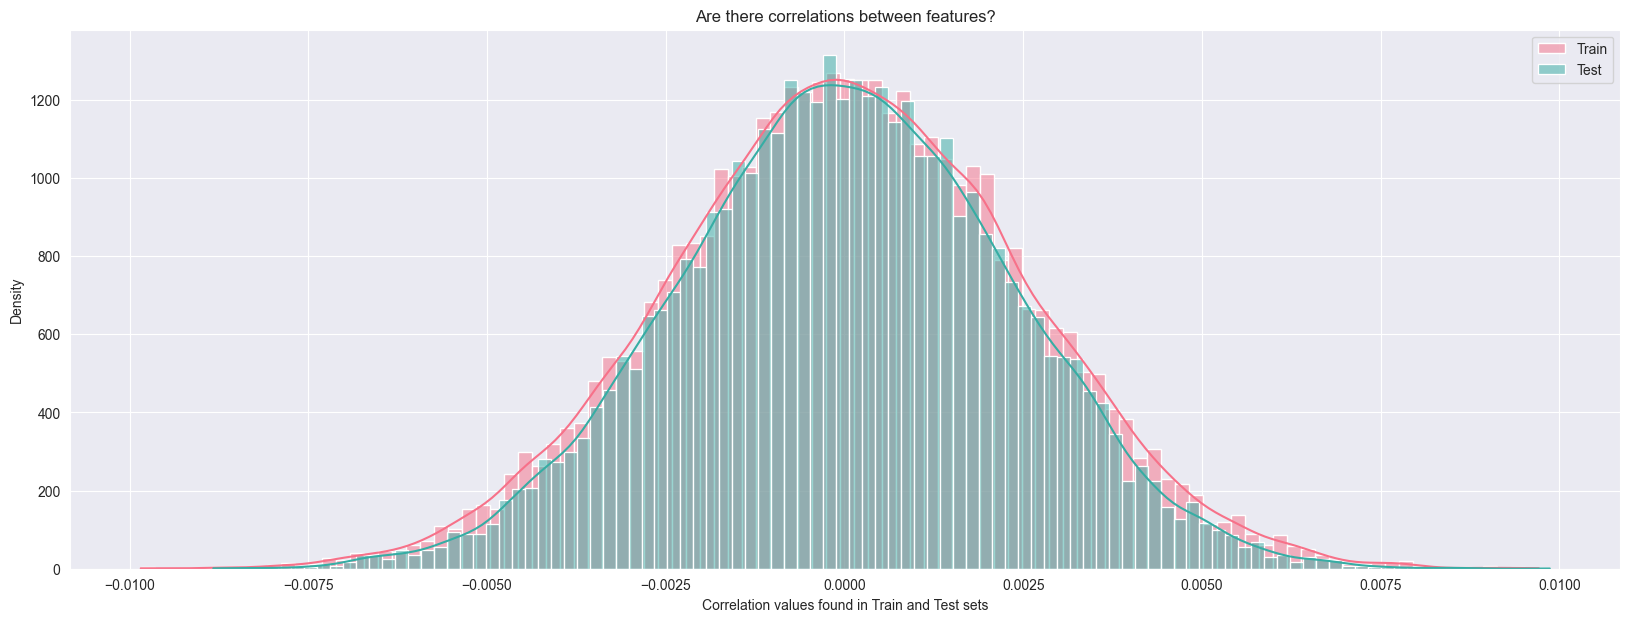

In [13]:
train_correlations = df_train.drop(columns=['target', 'ID_code']).corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

test_correlations = df_test.drop(columns=['ID_code']).corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20, 7))
sns.histplot(data=train_correlations, kde=True, label='Train', color='#f77189')
sns.histplot(data=test_correlations, kde=True, label='Test', color='#36ada4')
plt.xlabel("Correlation values found in Train and Test sets")
plt.ylabel("Density")
plt.title("Are there correlations between features?")
plt.legend()
plt.show()

## Setting a Baseline
---

### Train and Test Split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, plot_roc_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

import scipy.stats as stats
from sklearn.utils.fixes import loguniform

import lightgbm as lgb
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [15]:
X = df_train.drop(columns=['ID_code','target']).copy()
X.shape

(200000, 200)

In [16]:
y = df_train.target.copy()
y.shape

(200000,)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (140000, 200)
X_val shape: (60000, 200)
y_train shape: (140000,)
y_val shape: (60000,)


### SGD Classifier

RandomizedSearchCV took 55.76 seconds for 30 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.859 (std: 0.004)
Parameters: {'sgdclassifier__alpha': 0.2626165843956893, 'sgdclassifier__average': False, 'sgdclassifier__class_weight': None, 'sgdclassifier__early_stopping': True, 'sgdclassifier__learning_rate': 'optimal', 'sgdclassifier__loss': 'log_loss', 'sgdclassifier__max_iter': 3500, 'sgdclassifier__penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.859 (std: 0.004)
Parameters: {'sgdclassifier__alpha': 0.12350062529409607, 'sgdclassifier__average': False, 'sgdclassifier__class_weight': None, 'sgdclassifier__early_stopping': True, 'sgdclassifier__learning_rate': 'optimal', 'sgdclassifier__loss': 'log_loss', 'sgdclassifier__max_iter': 9500, 'sgdclassifier__penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.859 (std: 0.004)
Parameters: {'sgdclassifier__alpha': 3.753416368520498, 'sgdclassifier__average': False, 'sgdclassifier__class_weight': 

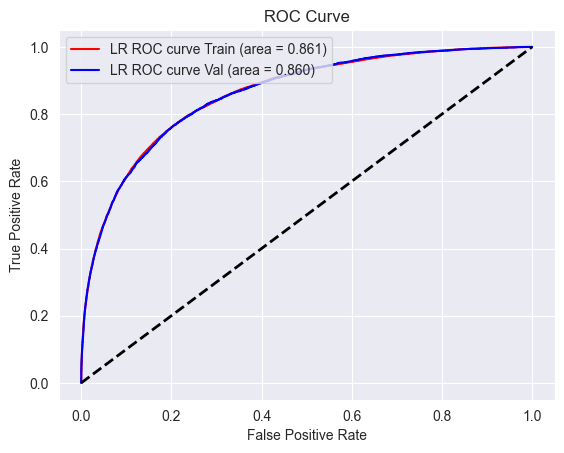

In [18]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
#X, y = load_digits(return_X_y=True, n_class=3)

# build a classifier
sgd = make_pipeline(StandardScaler(),
                    SGDClassifier(loss='log_loss'))


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results["mean_test_score"][candidate],
                results["std_test_score"][candidate],
            ))
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
    "sgdclassifier__loss": ['log_loss'],
    "sgdclassifier__class_weight": ['balanced', None],
    "sgdclassifier__average": [True, False],
    "sgdclassifier__alpha": loguniform(1e-2, 5),
    "sgdclassifier__learning_rate": ['optimal'],
    "sgdclassifier__max_iter":
    [int(x) for x in np.linspace(1000, 10000, num=19)],
    "sgdclassifier__penalty": ['l2'],
    "sgdclassifier__early_stopping": [True]
}

# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(sgd,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=5)

start = time()
random_search.fit(X_train, y_train)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# ROC AUC validations and Plot
print(f'Roc-Auc score train set: {roc_auc_score(y_train,random_search.predict_proba(X_train)[:, 1])}')
print(f'Roc-Auc score validation set: {roc_auc_score(y_val, random_search.predict_proba(X_val)[:, 1])}')


fpr_train, tpr_train, _ = roc_curve(y_train,
                                    random_search.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_val, tpr_val, _ = roc_curve(y_val,
                                random_search.predict_proba(X_val)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure()
plt.plot(fpr_train,
         tpr_train,
         color='red',
         label='LR ROC curve Train (area = %0.3f)' % roc_auc_train)
plt.plot(fpr_val,
         tpr_val,
         color='blue',
         label='LR ROC curve Val (area = %0.3f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show()

## LightGBM model

In [33]:
import lightgbm as lgb

model = lgb.LGBMClassifier(n_jobs=-1,
                           n_estimators=1000,
                           verbose=1,
                           )
model.fit(X_train,
          y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          eval_metric='auc',
          callbacks=[lgb.log_evaluation(0),lgb.early_stopping(100)])


[LightGBM] [Info] Number of positive: 13954, number of negative: 126046
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 140000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099671 -> initscore=-2.200881
[LightGBM] [Info] Start training from score -2.200881
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[390]	training's auc: 0.986775	training's binary_logloss: 0.119085	valid_1's auc: 0.885405	valid_1's binary_logloss: 0.217395


LGBMClassifier(n_estimators=1000, verbose=1)

In [34]:
print(f'Roc-Auc score train set: {roc_auc_score(y_train,model.predict_proba(X_train)[:, 1])}')
print(f'Roc-Auc score validation set: {roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])}')

Roc-Auc score train set: 0.9867753364796799
Roc-Auc score validation set: 0.8854054394134745


In [25]:
model_lgb = lgb.LGBMClassifier(boosting_type='gbdt',
                               n_jobs=-1,
                               n_estimators=1000,
                               objective='binary',
                               verbosity=-1,
                               )

params = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'num_leaves': Integer(2, 50),
    'max_depth': Integer(3, 50),
    'max_bin': Integer(10, 100),
    'is_unbalance': [True, False],
    'lambda_l1': Real(0, 5.0),
    'lambda_l2': Real(0, 5.0),
    'min_gain_to_split': Real(0, 1.0),
    'extra_trees': [True, False],
    'min_data_in_leaf': Integer(5, 20),
    'min_sum_hessian_in_leaf': Real(0.00001, 0.01),
}

bayes_cv_tuner = BayesSearchCV(estimator=model_lgb,
                               search_spaces=params,
                               scoring='roc_auc',
                               cv=StratifiedKFold(n_splits=3,
                                                  shuffle=True,
                                                  random_state=0),
                               n_iter=50,
                               verbose=-1)

bayes_cv_tuner.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='auc',
    callbacks=[lgb.log_evaluation(1000),
               lgb.early_stopping(100)])


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.000704508722078585, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.000704508722078585
[LightGBM] [Warning] lambda_l1 is set=2.354819705173055, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.354819705173055
[LightGBM] [Warning] min_gain_to_split is set=0.30337163536936346, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.30337163536936346
[LightGBM] [Warning] lambda_l2 is set=4.867280642817468, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.867280642817468
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.658502	valid_0's binary_logloss: 0.322677	valid_1's auc: 0.644804	valid_1's binary_logloss: 0.328487
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.000704508722

BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
              estimator=LGBMClassifier(n_estimators=1000, objective='binary',
                                       verbosity=-1),
              scoring='roc_auc',
              search_spaces={'extra_trees': [True, False],
                             'is_unbalance': [True, False],
                             'lambda_l1': Real(low=0, high=5.0, prior='uniform', transform='normalize'),
                             'lambda_l2': Real(low=0, high=5.0, prior='uni...
                             'max_depth': Integer(low=3, high=50, prior='uniform', transform='normalize'),
                             'min_data_in_leaf': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'min_gain_to_split': Real(low=0, high=1.0, prior='uniform', transform='normalize'),
                             'min_sum_hessian_in_leaf': Real(low=1e-05, high=0.01, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=2, high=50, prior='uniform', transform='normalize')},
              verbose=-1)

In [26]:
bayes_cv_tuner.best_score_

0.8848172615713502

In [27]:
bayes_cv_tuner.best_params_


OrderedDict([('extra_trees', True),
             ('is_unbalance', False),
             ('lambda_l1', 4.485271594009759),
             ('lambda_l2', 4.5063674604725845),
             ('learning_rate', 0.2321270370445691),
             ('max_bin', 100),
             ('max_depth', 3),
             ('min_data_in_leaf', 5),
             ('min_gain_to_split', 0.14849926933813368),
             ('min_sum_hessian_in_leaf', 0.009543964881924912),
             ('num_leaves', 50)])

In [35]:
print(f'Roc-Auc score train set: {roc_auc_score(y_train,bayes_cv_tuner.predict_proba(X_train)[:, 1])}')
print(f'Roc-Auc score validation set: {roc_auc_score(y_val, bayes_cv_tuner.predict_proba(X_val)[:, 1])}')

Roc-Auc score train set: 0.9389350516852901
Roc-Auc score validation set: 0.8909611497026407


In [37]:
predictions = bayes_cv_tuner.predict(df_test.drop(columns=['ID_code']))
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
np.unique(predictions)

array([0, 1])

## Prediction and Submission

In [46]:
##submission
sub_df = pd.DataFrame({"ID_code": df_test["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("lgb_submission.csv", index=False)

In [45]:
sub_df

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [48]:
model_lgb = lgb.LGBMClassifier(
    boosting_type='gbdt',
    n_jobs=-1,
    n_estimators=1000,
    objective='binary',
    verbosity=-1,
)

params = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'num_leaves': Integer(2, 50),
    'max_depth': Integer(3, 50),
    'max_bin': Integer(10, 100),
    'is_unbalance': [True, False],
    'lambda_l1': Real(0, 5.0),
    'lambda_l2': Real(0, 5.0),
    'min_gain_to_split': Real(0, 1.0),
    'extra_trees': [True, False],
    'min_data_in_leaf': Integer(5, 20),
    'min_sum_hessian_in_leaf': Real(0.00001, 0.01),
}

bayes_cv_tuner = BayesSearchCV(estimator=model_lgb,
                               search_spaces=params,
                               scoring='roc_auc',
                               cv=StratifiedKFold(n_splits=3,
                                                  shuffle=True,
                                                  random_state=0),
                               n_iter=50,
                               verbose=-1)

bayes_cv_tuner.fit(
    X,
    y,
    #eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='auc',
    callbacks=[lgb.log_evaluation(1000),
              ])


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0057542550502353695, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0057542550502353695
[LightGBM] [Warning] lambda_l1 is set=4.368408801261204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.368408801261204
[LightGBM] [Warning] min_gain_to_split is set=0.27088657465134663, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.27088657465134663
[LightGBM] [Warning] lambda_l2 is set=2.4180728406300833, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4180728406300833
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0057542550502353695, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0057542550502353695
[LightGBM] [Warning] lambda_l1 is set=4.368408801261204, reg_alpha=0.0 will be ignored. Current value: la

BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
              estimator=LGBMClassifier(n_estimators=1000, objective='binary',
                                       verbosity=-1),
              scoring='roc_auc',
              search_spaces={'extra_trees': [True, False],
                             'is_unbalance': [True, False],
                             'lambda_l1': Real(low=0, high=5.0, prior='uniform', transform='normalize'),
                             'lambda_l2': Real(low=0, high=5.0, prior='uni...
                             'max_depth': Integer(low=3, high=50, prior='uniform', transform='normalize'),
                             'min_data_in_leaf': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'min_gain_to_split': Real(low=0, high=1.0, prior='uniform', transform='normalize'),
                             'min_sum_hessian_in_leaf': Real(low=1e-05, high=0.01, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=2, high=50, prior='uniform', transform='normalize')},
              verbose=-1)

In [49]:
print(
    f'Roc-Auc score train set: {roc_auc_score(y_train,bayes_cv_tuner.predict_proba(X_train)[:, 1])}'
)
print(
    f'Roc-Auc score validation set: {roc_auc_score(y_val, bayes_cv_tuner.predict_proba(X_val)[:, 1])}'
)


Roc-Auc score train set: 0.9076875049275211
Roc-Auc score validation set: 0.9066801292161041


In [50]:
bayes_cv_tuner.best_estimator_

LGBMClassifier(extra_trees=False, is_unbalance=False,
               lambda_l1=0.28238110061898947, lambda_l2=2.91713551885576,
               learning_rate=0.37854104221461826, max_bin=86, max_depth=36,
               min_data_in_leaf=5, min_gain_to_split=1.0,
               min_sum_hessian_in_leaf=0.004868896002991668, n_estimators=1000,
               num_leaves=2, objective='binary', verbosity=-1)